# Part-1 Data Preprocessing

Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the data

In [3]:
df=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Finding null values

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Making a correlation heat map

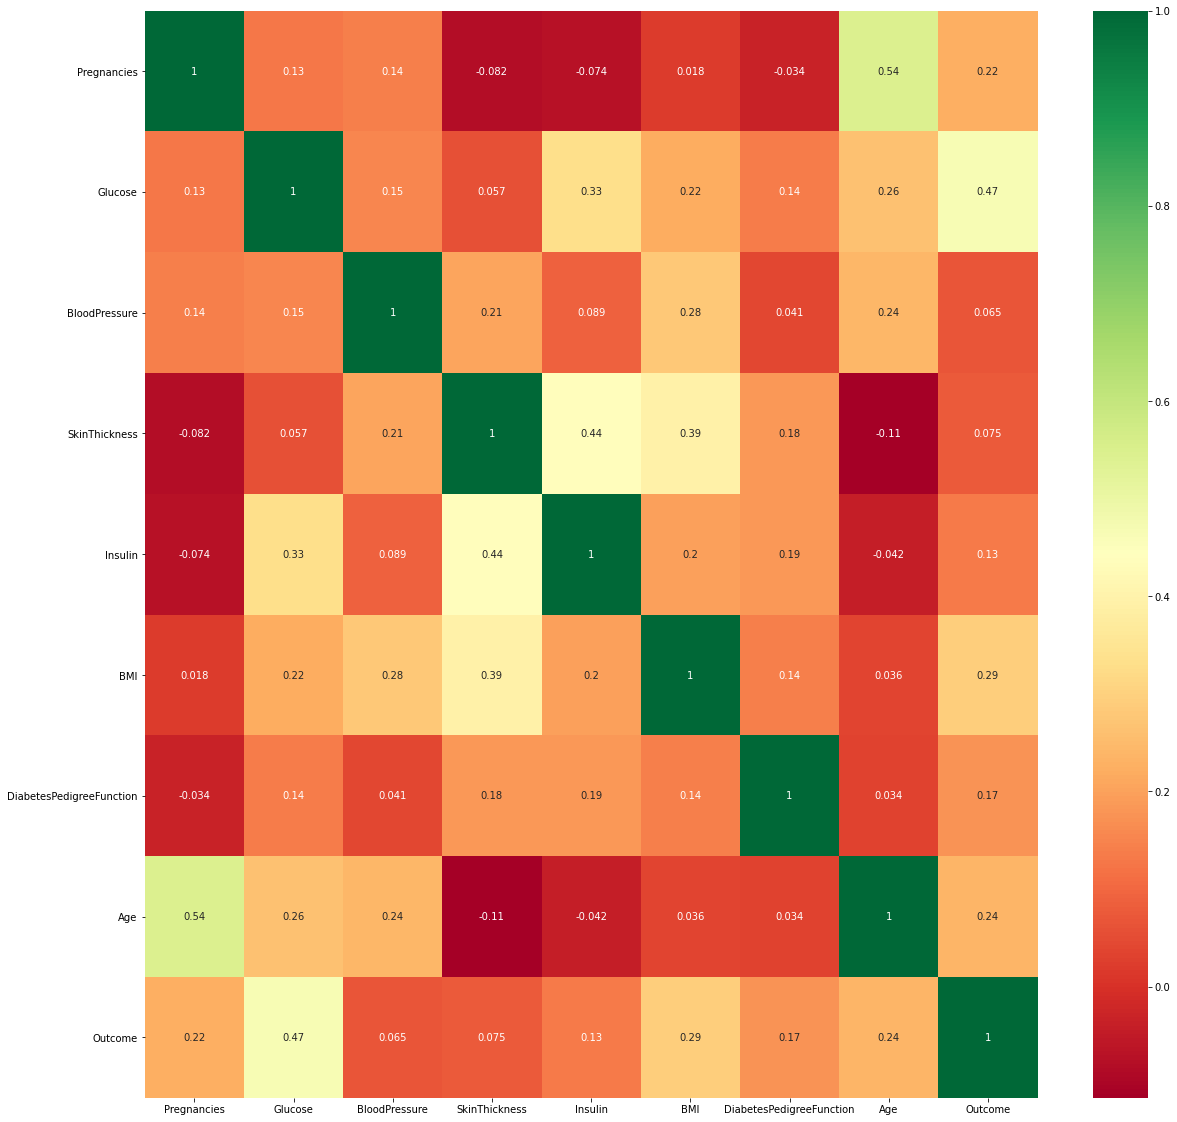

In [7]:
cormat=df.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

Finding the number of positive or negative outcomes of the data for diabetes

In [8]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Splitting the data for model

In [9]:
from sklearn.model_selection import train_test_split

Making our features and targets

In [10]:
X=df.drop('Outcome',axis=1)
y=df.Outcome

Splitting the data  into train and test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

Finding values that are 0

In [12]:
df.value_counts(df['Pregnancies']==0)

Pregnancies
False    657
True     111
dtype: int64

Entries that have values as 0 can negatively affect the model. To replace those values we are using impute.

In [13]:
from sklearn.impute import SimpleImputer

We are filling the values with mean of the column.

In [14]:
fill_values = SimpleImputer(missing_values=0, strategy="mean")

In [15]:
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

# Part-2 Working on the model.

Importing the required library for Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier


Fitting the model

In [17]:
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

Predicting the test values from the model.

In [18]:
predict_train_data = random_forest_model.predict(X_test)



Evaluating the model

In [19]:
from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.766


In [20]:
metrics.confusion_matrix(y_test,predict_train_data)

array([[130,  14],
       [ 40,  47]])